In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import zarr
import pandas as pd

In [2]:
nwp_path = "gs://solar-pv-nowcasting-data/NWP/UK_Met_Office/UKV_intermediate_version_3.zarr/"
gsp_path = "gs://solar-pv-nowcasting-data/PV/GSP/v5/pv_gsp.zarr"
gsp = xr.open_zarr(gsp_path)
nwp = xr.open_zarr(nwp_path)
nwp

<xarray.Dataset>
Dimensions:    (variable: 17, init_time: 5319, step: 37, y: 704, x: 548)
Coordinates:
  * init_time  (init_time) datetime64[ns] 2020-01-01 ... 2021-11-08T15:00:00
  * step       (step) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 12:00:00
  * variable   (variable) <U6 'cdcb' 'lcc' 'mcc' ... 'wdir10' 'prmsl' 'prate'
  * x          (x) int64 -239000 -237000 -235000 ... 851000 853000 855000
  * y          (y) int64 1223000 1221000 1219000 ... -179000 -181000 -183000
Data variables:
    UKV        (variable, init_time, step, y, x) float32 dask.array<chunksize=(17, 1, 1, 352, 274), meta=np.ndarray>

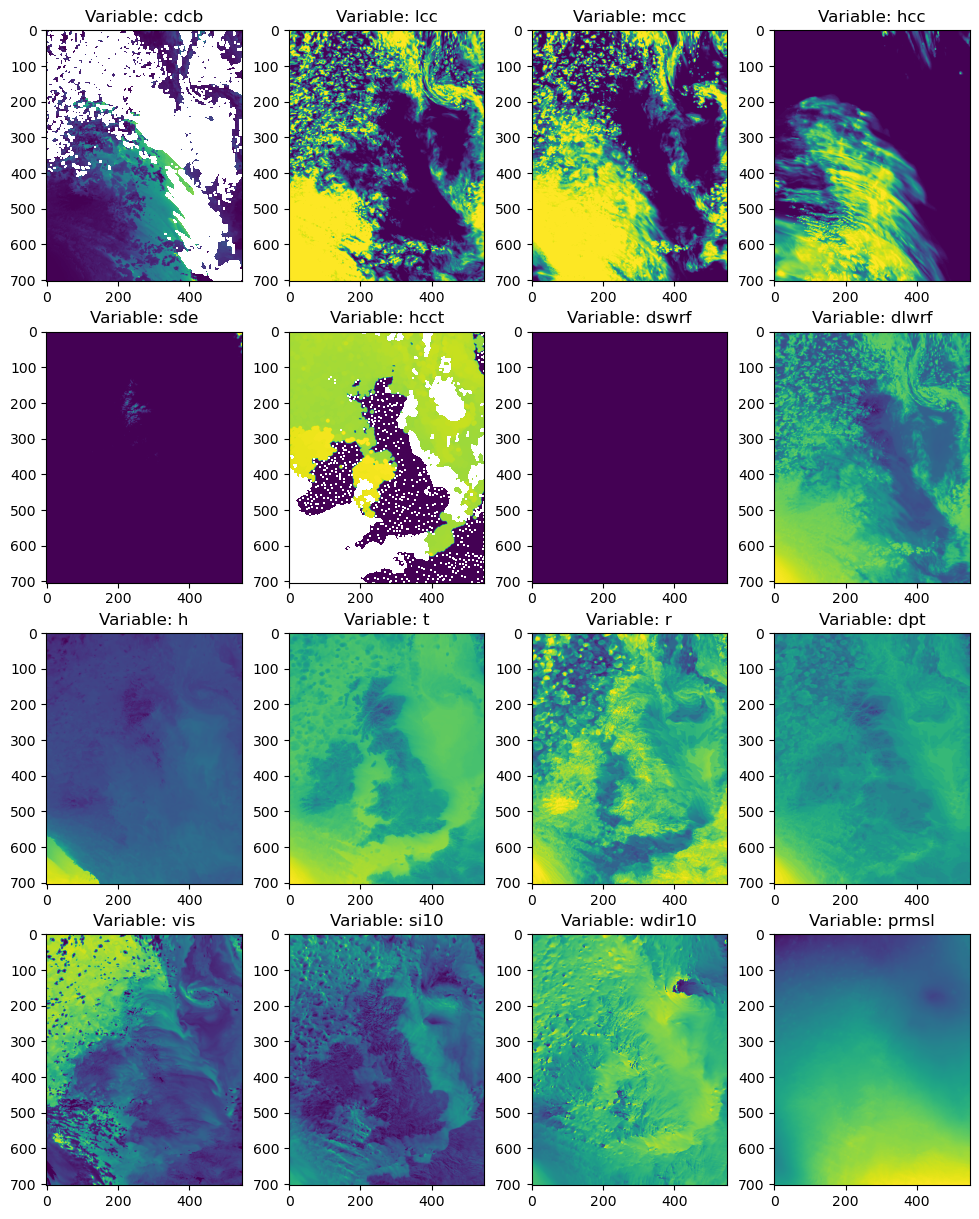

In [5]:
fig, axes = plt.subplots(4,4, figsize=(12, 15))
_vars = nwp.coords["variable"].values

for x in range(4):
    for y in range(4):
        var_num = 4*x + y
        axes[x][y].imshow(nwp.isel(step=3, init_time=500, variable=var_num).to_array().values[0])
        axes[x][y].set_title(f"Variable: {_vars[var_num]}")

In [24]:
nwp.to_array()

<xarray.DataArray (variable: 17, init_time: 5319, step: 37, y: 704, x: 548)>
dask.array<stack, shape=(1, 17, 5319, 37, 704, 548), dtype=float32, chunksize=(1, 17, 1, 1, 352, 274), chunktype=numpy.ndarray>
Coordinates:
  * init_time  (init_time) datetime64[ns] 2020-01-01 ... 2021-11-08T15:00:00
  * step       (step) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 12:00:00
  * variable   (variable) object 'UKV'
  * x          (x) int64 -239000 -237000 -235000 ... 851000 853000 855000
  * y          (y) int64 1223000 1221000 1219000 ... -179000 -181000 -183000